[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.2 Szenarien-Residuallast


In [116]:

# OPTIONAL: Load the "autoreload" extension so that code can change
#import config
import matplotlib.pyplot as plt

import FLUCCOplus.scenarios
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.scenarios import Scenario, Names #Comparison


In [141]:
df20= elmap.fetch(2020)
df20

,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_storage_avg,total_discharge_avg,total_import_avg,total_export_avg,...,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_CH_avg,latest_forecasted_power_net_import_CZ_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_HU_avg,latest_forecasted_power_net_import_IT-NO_avg,latest_forecasted_power_net_import_SI_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,230.94,184.74,173.47,427.08,0.0,6306.00,0.00,135.25,1525.00,2231.00,...,6498.0,5588.0,-406.0,414.0,1007.0,-765.0,-190.0,NaN,0.0,1984.0
2020-01-01 01:00:00+00:00,221.99,180.60,173.47,440.97,0.0,6196.25,0.00,32.50,1178.00,1850.00,...,6183.0,5448.0,-364.0,513.0,322.0,-676.0,-178.0,NaN,0.0,1820.0
2020-01-01 02:00:00+00:00,206.55,152.84,NaN,414.65,0.0,5569.50,465.25,0.00,1444.00,1294.00,...,5275.0,5244.0,-293.0,468.0,1269.0,-598.0,-27.0,NaN,0.0,1608.0
2020-01-01 03:00:00+00:00,211.44,148.56,NaN,417.45,0.0,5245.75,507.50,0.00,1601.00,1187.00,...,5001.0,5192.0,-250.0,470.0,1332.0,-716.0,0.0,NaN,0.0,1420.0
2020-01-01 04:00:00+00:00,221.24,158.83,NaN,414.74,0.0,5109.00,353.25,0.00,1647.00,1087.00,...,4989.0,5312.0,-292.0,359.0,1590.0,-714.0,-6.0,NaN,0.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00+00:00,270.48,218.70,173.47,351.44,0.0,4941.00,0.00,331.25,3549.00,1773.25,...,5438.0,7728.0,-849.0,600.0,2685.0,39.0,-294.0,NaN,0.0,624.0
2020-12-30 20:00:00+00:00,268.40,214.85,173.47,341.19,0.0,4780.50,0.00,31.25,3556.25,1729.00,...,5111.0,7240.0,-930.0,600.0,2690.0,130.0,-288.0,NaN,0.0,728.0
2020-12-30 21:00:00+00:00,268.74,208.86,173.47,342.99,0.0,4464.00,0.00,49.00,3663.75,1534.00,...,4866.0,7108.0,-955.0,560.0,2982.0,161.0,-288.0,NaN,0.0,760.0


Es wird hier alle Zukunftsszenarien für ein Jahr in csv-Dateien getrennt nach cutoffs gespeichert.

In [119]:
import FLUCCOplus.transform as traffo

asc = FLUCCOplus.scenarios.all()
ausbauscenarien = list(asc.index[3:])
base_year = 2020 # 2015,2016, 2017, 2018, 2019
cutoffs = [0.4,0.45,0.5,0.55]

exDf_cutoff40 = pd.DataFrame()
exDf_cutoff45 = pd.DataFrame()
exDf_cutoff50 = pd.DataFrame()
exDf_cutoff55 = pd.DataFrame()

basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
PV_ostwest = traffo.Transformation(kind="Photovoltaik", weights=[1.1,1,0.9,0.6,0.6,0.9,1,1.1], timeframe=24)
batteriespeicher = traffo.Transformation(kind="Photovoltaik", weights=[0.85, 0.85, 0.85, 0.6, 0.7, 0.8, 1.05, 1.3], timeframe=24)

szenario = "PV_ostwest"

for s in ausbauscenarien:
    scenario_name = s
    scenario = Scenario(
        name = scenario_name,
        scenario = scenario_name,
        em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
    )

    scenario.reset()
    scenario.apply([PV_ostwest], reset=True)
    #scenario.define_signal("RES0", separator=0.5)

    signals = pd.DataFrame()

    for i, c in enumerate(cutoffs):
        scenario.define_signal("RES0", separator=c)
        #scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
        signals[f"{c*100} %"] = scenario.signal

    exDf_cutoff40[s] = signals["40.0 %"]
    exDf_cutoff45[s] = signals["45.0 %"]
    exDf_cutoff50[s] = signals["50.0 %"]
    exDf_cutoff55[s] = signals[f"{c*100} %"]

#if not os.path.exists(f"../Data/interim/{szenario}_{base_year}"):
#        os.makedirs(f"../Data/interim/{szenario}_{base_year}")

exDf_cutoff40.to_csv(config.DATA_INTERIM / f"RES0_{szenario}_{base_year}-40.csv", sep=";", decimal=",")
exDf_cutoff45.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-45.csv", sep=";", decimal=",")
exDf_cutoff50.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-50.csv", sep=";", decimal=",")
exDf_cutoff55.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-55.csv", sep=";", decimal=",")

C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages

In [120]:
ausbauscenarien

['Energie und Klimazukunft 2030 (Veigl17)',
 'Erneuerbare Energie 2030 (UBA16)',
 'WEM 2030 (UBA17)',
 'Transition 2030 (UBA17)',
 'Energie und Klimazukunft 2050 (Veigl17)',
 'Erneuerbare Energie 2050 (UBA16)',
 'WEM 2050 (UBA17)',
 'Transition 2050 (UBA17)',
 '100% Erneuerbare Deckung 2050 (FLUCCO+)',
 '100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)',
 '100% Erneuerbare Deckung 2050 ohne Speicherausbau (FLUCCO+)']

Ab hier erfolg die detaillierte Analyse momentan nur noch mit einem Ausbauszenario

In [121]:
scenario_name = Names.flucco_2050

base_scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Text(0.5, 0, '')

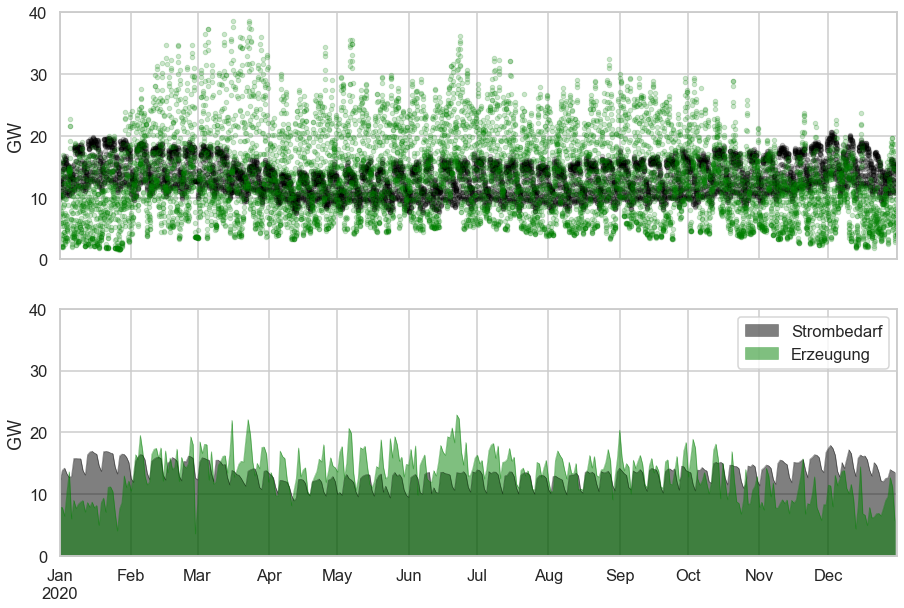

In [122]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)

scenario.plot_supplydemand(ax=ax[0], hourly=True, kind="line")
scenario.plot_supplydemand(ax=ax[1], daily=True, kind="area", legend=True)
[axx.set_ylabel("GW") for axx in ax]
ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)
ax[1].set_xlabel("")

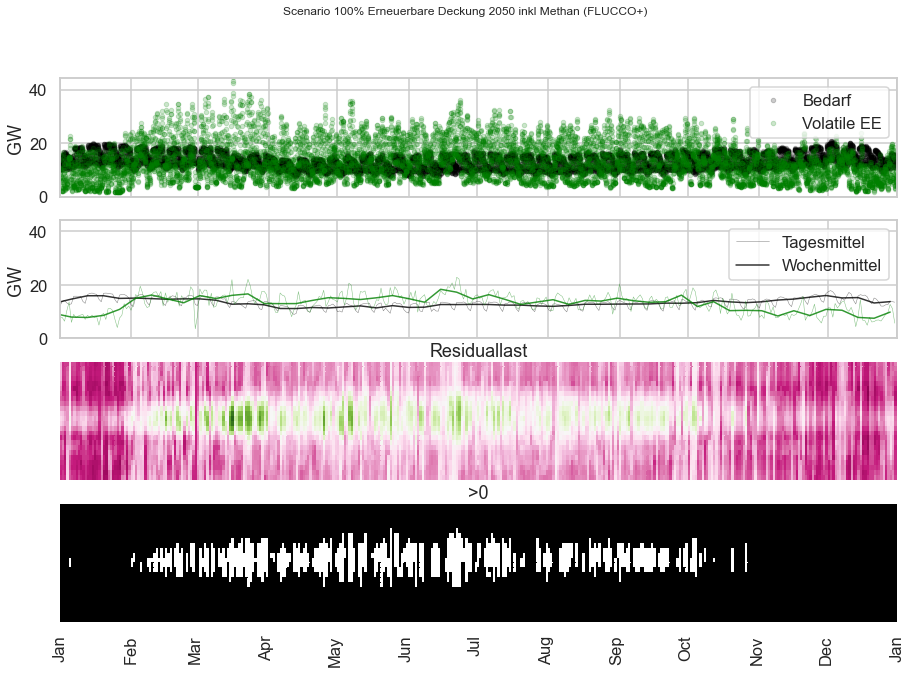

In [123]:
scenario.reset()
fig, ax = scenario.plot()

plt.savefig(config.PLOTS / "Lineares_Szenario.png", dpi=300)

In [124]:
scenario.TSD

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Erzeugung,RES0,RES1
datetime,,,,,,,,,
2020-01-01 00:00:00+00:00,11.109838,0.320254,2.035594,8.278687,0.0,10.314281,10.634535,-0.795557,-0.475303
2020-01-01 01:00:00+00:00,10.764063,0.080474,2.002467,8.345959,0.0,10.348426,10.428900,-0.415637,-0.335163
2020-01-01 02:00:00+00:00,10.178086,0.000000,2.053888,7.786759,0.0,9.840647,9.840647,-0.337439,-0.337439
2020-01-01 03:00:00+00:00,9.980500,0.000000,2.015322,7.185513,0.0,9.200836,9.200836,-0.779665,-0.779665
2020-01-01 04:00:00+00:00,10.297219,0.000000,2.036830,6.239498,0.0,8.276328,8.276328,-2.020891,-2.020891
...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00+00:00,13.652786,1.226163,2.396780,1.244536,0.0,3.641316,4.867478,-10.011470,-8.785308
2020-12-30 20:00:00+00:00,12.860506,0.329090,2.212355,1.786918,0.0,3.999273,4.328363,-8.861233,-8.532143
2020-12-30 21:00:00+00:00,12.867770,0.234754,2.093443,1.749078,0.0,3.842521,4.077275,-9.025250,-8.790495


In [125]:
scenario

100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)

Szenario                target         base      scale
Jahr               2050.000000   2020.00000        NaN
Strombedarf      116723.788045  60256.51125   1.937115
Mismatch              0.000000          NaN        NaN
Importe               0.000000          NaN        NaN
Stromproduktion  116723.788045          NaN        NaN
Wasserkraft       49163.070888          NaN        NaN
Pumpspeicher      15732.182684   4789.59619   3.284657
Laufkraft         33430.888204  33807.07600   0.988873
Windkraft         30238.326513   7191.87300   4.204513
Photovoltaik      35376.805146    919.62100  38.468897
Volatile EE       99046.019863          NaN        NaN
Nicht-Volatile    17677.768183          NaN        NaN
RES0              17677.768183          NaN        NaN
RES1               1945.585499          NaN        NaN
RES2             -15732.182684          NaN        NaN

<AxesSubplot:xlabel='datetime'>

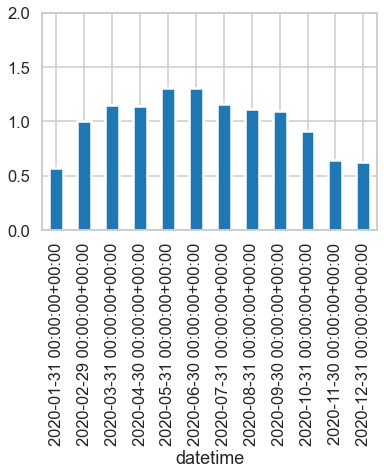

In [126]:
scenario.plot_monthly_mismatch()

<AxesSubplot:>

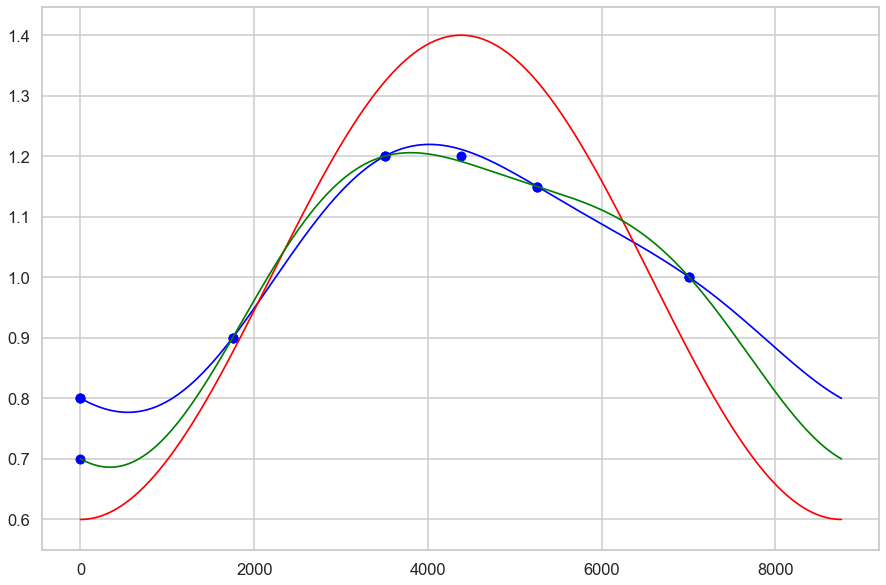

In [127]:
import FLUCCOplus.transform as traffo
basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
fig,ax = plt.subplots(1,1, figsize = (15,10))
saisonale_speicher1.plot(ax=ax, line_color="blue")
saisonale_speicher2.plot(ax=ax, line_color="red")
saisonale_speicher3.plot(ax=ax, line_color="green")


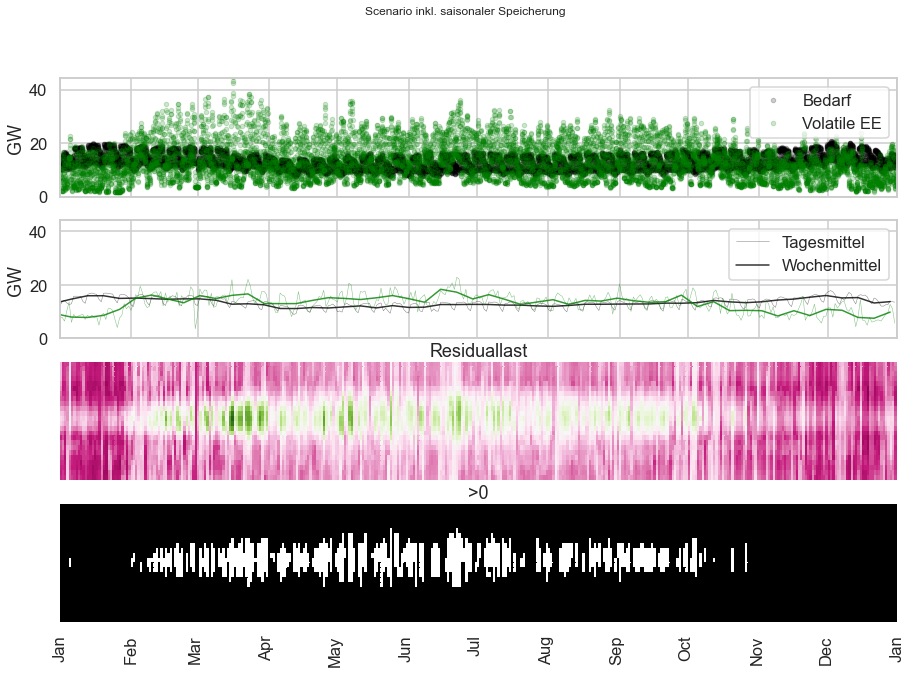

In [128]:
scenario.reset()
scenario.apply([basis], reset=True)
fig, ax = scenario.plot()
fig.suptitle("Scenario inkl. saisonaler Speicherung");
plt.savefig(config.PLOTS / "Speicherszenario.png", dpi=300)

In [129]:
scenario.define_signal("RES0", separator=0.5)


(<Figure size 1080x360 with 3 Axes>,
 array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
        <AxesSubplot:xlabel='datetime'>], dtype=object))

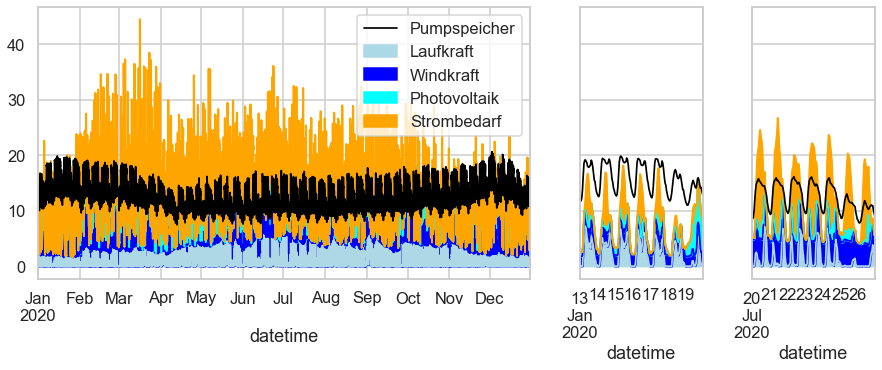

In [130]:

scenario.plot_energy_mix()


In [131]:
scenario.signal

datetime
2020-01-01 00:00:00+00:00    0.0
2020-01-01 01:00:00+00:00    0.0
2020-01-01 02:00:00+00:00    0.0
2020-01-01 03:00:00+00:00    0.0
2020-01-01 04:00:00+00:00    0.0
                            ... 
2020-12-30 19:00:00+00:00    0.0
2020-12-30 20:00:00+00:00    0.0
2020-12-30 21:00:00+00:00    0.0
2020-12-30 22:00:00+00:00    0.0
2020-12-30 23:00:00+00:00    0.0
Freq: H, Name: RES0, Length: 8760, dtype: float64

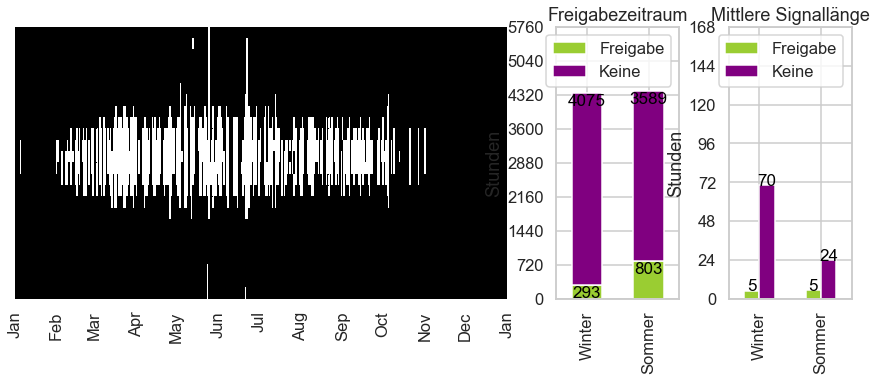

In [132]:
scenario.plot_signal();

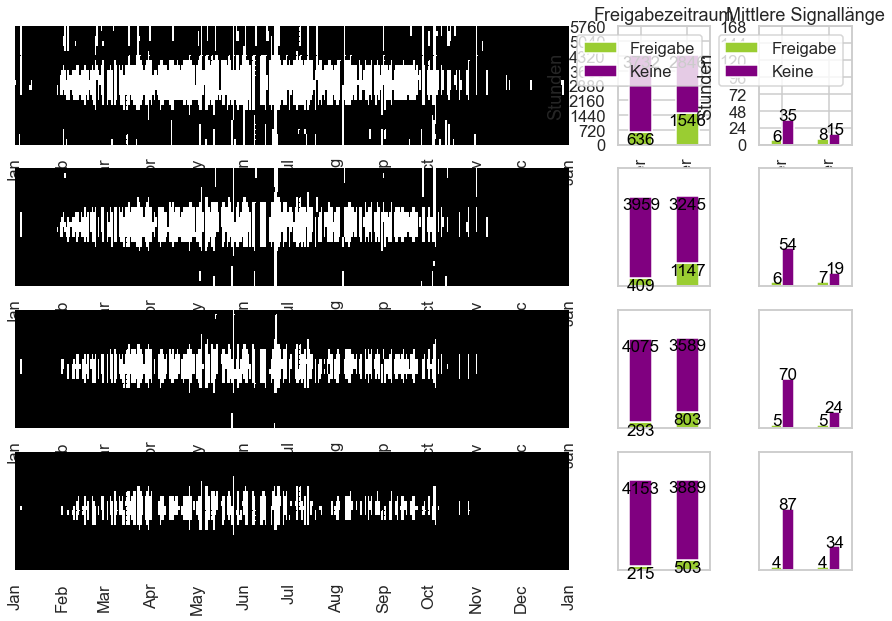

In [133]:
cutoffs = [0.4,0.45,0.5,0.55]

fig, ax = plt.subplots(4,3, figsize=(15,10), gridspec_kw={'width_ratios':[6,1,1]})
signals = pd.DataFrame()

for i, c in enumerate(cutoffs):
    scenario.define_signal("RES0", separator=c)
    scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
    signals[f"{c*100} %"] = scenario.signal

In [134]:
signals

,40.0 %,45.0 %,50.0 %,55.00000000000001 %
datetime,,,,
2020-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0
2020-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2020-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0
2020-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0
2020-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-12-30 19:00:00+00:00,0.0,0.0,0.0,0.0
2020-12-30 20:00:00+00:00,0.0,0.0,0.0,0.0
2020-12-30 21:00:00+00:00,0.0,0.0,0.0,0.0


In [135]:
if not os.path.exists("../Data/interim"):
        os.makedirs("../Data/interim")

In [136]:
#Flucco_RES0 = pd.DataFrame()
#Flucco_RES0["100% Erneuerbare Deckung 2050 (FLUCCO+)"] = signals["50.0 %"]
#Flucco_RES0.to_csv(config.DATA_INTERIM / "FLUCCO_RES0_50.csv", sep=";", decimal=",")

In [137]:
signals.to_csv(config.DATA_INTERIM / "RES0-40-55.csv", sep=";", decimal=",")

In [138]:
# c1 = Comparison(base_scenario, scenario)